In [1]:
%pip install joypy seaborn ridgeplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 379.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 8.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 8.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 7.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from scripts.preprocess.utils import gc_percentage
from matplotlib.lines import Line2D

In [3]:
SELECTED_SPECIES = ['Sinorhizobium meliloti 1021', 'Bradyrhizobium japonicum USDA 110',
                    'Shigella flexneri 5a str. M90T', 'Burkholderia cenocepacia J2315',
                    'Escherichia coli str K-12 substr. MG1655',
                    'Pseudomonas putida strain KT2440',
                    'Xanthomonas campestris pv. campestrie B100',
                    'Acinetobacter baumannii ATCC 17978',
                    'Klebsiella aerogenes KCTC 2190',
                    'Agrobacterium tumefaciens str C58',]

SELECTED_SPECIES_LABELS = ['S. meliloti', 'B. japonicum',
                           'S. flexneri', 'B. cenocepacia',
                           'E. coli',
                           'P. putida',
                           'X. campestris',
                           'A. baumannii',
                           'K. aerogenes',
                           'A. tumefaciens']

SELECTED_SPECIES_LABELS_OVERALL = [*SELECTED_SPECIES_LABELS, 'Overall']

PROMOTER_CLASS_LABEL_MAP = {0: 'Non-promoter', 1: 'Promoter'}

SELECTED_SPECIES_LABELS_MAP = {
    SELECTED_SPECIES[i]: SELECTED_SPECIES_LABELS[i] for i in range(len(SELECTED_SPECIES))}

In [4]:
all_promoters_df = pd.read_csv('./data/processed/all_promoters.csv')
species_class_df = pd.read_csv('./data/processed/species_classification.csv', sep=";")

/tmp/ipykernel_109/867368769.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  all_promoters_df = pd.read_csv('./data/processed/all_promoters.csv')


In [5]:
all_promoters_df = all_promoters_df.merge(species_class_df, left_on='SpeciesName', right_on='SpeciesName')

In [18]:
# Suponiendo que 'all_promoters_df' es tu dataframe
# Agrupar por 'Phylum' y 'SpeciesName' y contar las entradas
grouped_df = all_promoters_df.groupby(['Phylum', 'SpeciesName']).size().reset_index(name='N° promoters')

# Agregar fila de resumen 'Overall' que suma todos los promotores para cada 'Phylum'
overall_summary = grouped_df.groupby('Phylum')['N° promoters'].sum().reset_index()
overall_summary['SpeciesName'] = 'Overall'
overall_summary = overall_summary[['Phylum', 'SpeciesName', 'N° promoters']]

# Combinar los resúmenes 'Overall' con el dataframe agrupado
final_df = pd.concat([grouped_df, overall_summary], ignore_index=True)

# Agregar una columna de 'sort order' basada en el total de promotores por Phylum
sort_order = overall_summary[['Phylum', 'N° promoters']].set_index('Phylum').to_dict()['N° promoters']
final_df['Sort Order'] = final_df['Phylum'].map(sort_order)

# Agregar una columna para identificar filas 'Overall'
final_df['Is Overall'] = final_df['SpeciesName'] == 'Overall'

# Ordenar primero por 'Sort Order' (descendente), dentro de cada Phylum ordenar de modo que 'Overall' aparece al final
final_df = final_df.sort_values(by=['Sort Order', 'Phylum', 'Is Overall', 'SpeciesName'], ascending=[False, True, True, True])

# Eliminar las columnas temporales si no se desea mantener
final_df.drop(columns=['Sort Order', 'Is Overall'], inplace=True)

# Mostrar o trabajar con 'final_df'
final_df

,Phylum,SpeciesName,N° promoters
18,Pseudomonadota,Acinetobacter baumannii ATCC 17978,1540
19,Pseudomonadota,Agrobacterium tumefaciens str C58,706
20,Pseudomonadota,Bradyrhizobium japonicum USDA 110,15933
21,Pseudomonadota,Burkholderia cenocepacia J2315,10831
22,Pseudomonadota,Escherichia coli str K-12 substr. MG1655,8616
23,Pseudomonadota,Klebsiella aerogenes KCTC 2190,763
24,Pseudomonadota,Pseudomonas putida strain KT2440,7938
25,Pseudomonadota,Shigella flexneri 5a str. M90T,14051
26,Pseudomonadota,Sinorhizobium meliloti 1021,17003
27,Pseudomonadota,Xanthomonas campestris pv. campestrie B100,3067


In [6]:
# count by kingdom column
bacteria_df = all_promoters_df[all_promoters_df['Kingdom'] == 'Bacteria']
bacteria_df['gc'] = bacteria_df['Sequence'].apply(gc_percentage)
print(bacteria_df['Phylum'].value_counts())

Pseudomonadota      80448
Cyanobacteriota     16122
Campylobacterota    10370
Bacillota            8962
Actinomycetota       5237
Mycoplasmatota        231
Name: Phylum, dtype: int64


/tmp/ipykernel_109/1098002213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bacteria_df['gc'] = bacteria_df['Sequence'].apply(gc_percentage)


In [46]:
bacteria_df

,id,Type,PromoterName,SpeciesName,GeneName,GeneStart,GeneEnd,GeneProduct,TSSPosition,Strand,...,Kingdom,Phylum,Class,Order,Family,Genus,Species,Source,Notes,gc
0,17003,Chr,SMc_TSS10464,Sinorhizobium meliloti 1021,SMc_asRNA_2260,3654025.0,3654122.0,NaN,3654025.0,+,...,Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales,Rhizobiaceae,Sinorhizobium,Sinorhizobium meliloti,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,NaN,59.2593
1,17002,Chr,SMc_TSS10463,Sinorhizobium meliloti 1021,SMc02794,3654135.0,3653176.0,Probable uroporphyrinogen decarboxylase,3654106.0,-,...,Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales,Rhizobiaceae,Sinorhizobium,Sinorhizobium meliloti,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,NaN,66.6667
2,17001,Chr,SMc_TSS10462,Sinorhizobium meliloti 1021,SMc02795,3653165.0,3652623.0,Hypothetical transmembrane protein,3653090.0,-,...,Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales,Rhizobiaceae,Sinorhizobium,Sinorhizobium meliloti,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,NaN,67.9012
3,17000,Chr,SMc_TSS10461,Sinorhizobium meliloti 1021,SMc_asRNA_2259,3652827.0,3652952.0,NaN,3652855.0,+,...,Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales,Rhizobiaceae,Sinorhizobium,Sinorhizobium meliloti,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,NaN,59.2593
4,16999,Chr,SMc_TSS10460,Sinorhizobium meliloti 1021,SMc_asRNA_2259,3652827.0,3652952.0,NaN,3652827.0,+,...,Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales,Rhizobiaceae,Sinorhizobium,Sinorhizobium meliloti,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,NaN,56.7901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128834,5,chr,mTSS05,Onion yellows phytoplasma OY-M,pcnB,128312.0,127074.0,tRNA nucleotidyltransferase/polyA polymerase,128808.0,-,...,Bacteria,Mycoplasmatota,Mollicutes,Acholeplasmatales,Acholeplasmataceae,Candidatus Phytoplasma,not identified,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,NaN,30.8642
128835,4,chr,mTSS04,Onion yellows phytoplasma OY-M,NaN,120521.0,121441.0,hypothetical protein PAM_095,120512.0,+,...,Bacteria,Mycoplasmatota,Mollicutes,Acholeplasmatales,Acholeplasmataceae,Candidatus Phytoplasma,not identified,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,NaN,29.6296
128836,3,chr,mTSS03,Onion yellows phytoplasma OY-M,NaN,107898.0,108221.0,hypothetical protein PAM_084,107574.0,+,...,Bacteria,Mycoplasmatota,Mollicutes,Acholeplasmatales,Acholeplasmataceae,Candidatus Phytoplasma,not identified,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,NaN,32.0988
128837,2,chr,mTSS02,Onion yellows phytoplasma OY-M,NaN,89402.0,90103.0,hypothetical protein PAM_069,89321.0,+,...,Bacteria,Mycoplasmatota,Mollicutes,Acholeplasmatales,Acholeplasmataceae,Candidatus Phytoplasma,not identified,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,NaN,34.5679


In [42]:
import joypy

In [43]:
def generate_gc_ridgeplot(df, title):
    df = pd.DataFrame({'promoters': df[df['label'] == 1]['gc'],
                       'non-promoters': df[df['label'] == 0]['gc'],
                       'species': df['SpeciesName']})

    fig, ax = joypy.joyplot(
        df, by="species", legend=True, grid=True, title=title)

['Pseudomonadota' 'Cyanobacteriota' 'Actinomycetota' 'Bacillota'
 'Campylobacterota' 'Mycoplasmatota']
Cyanobacteriota


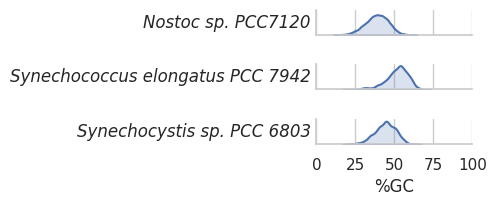

Actinomycetota


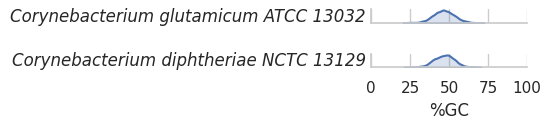

Bacillota


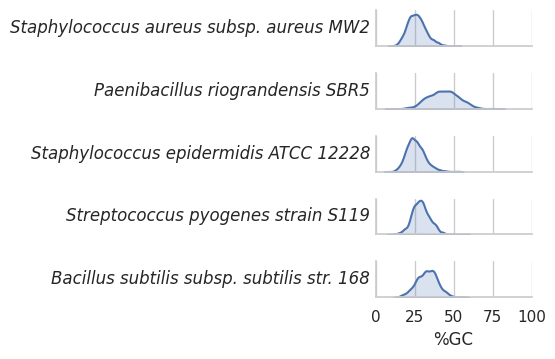

Campylobacterota


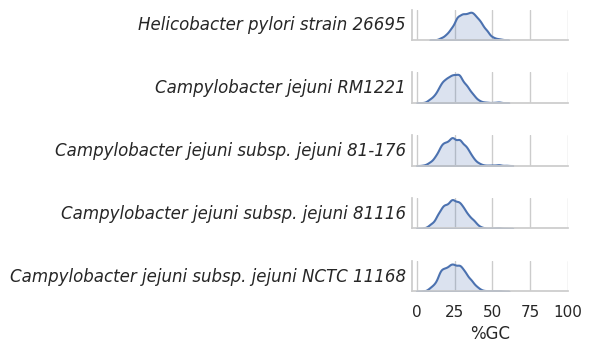

Mycoplasmatota


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


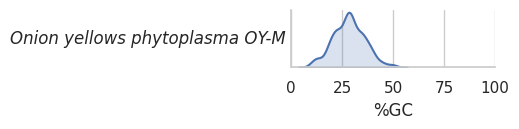

In [103]:
phylums = bacteria_df['Phylum'].unique()
selected_phylums = ['Bacill']

print(phylums)


for phylum in phylums[1:]:
    phylum_df = bacteria_df[bacteria_df['Phylum'] == phylum]
    print(phylum)
    
    # Crear un FacetGrid sin títulos de margen
    g = sns.FacetGrid(phylum_df, row='SpeciesName', aspect=3.5, height=0.75, margin_titles=False, sharey=True)
    g.set(ylabel=None)
    g.set_titles("")  # Asegurarse de que los títulos están vacíos

    # Mapear kdeplot para la columna 'gc' en cada fila del FacetGrid
    g.map(sns.kdeplot, 'gc', bw_adjust=0.8, clip_on=True, fill=True, alpha=0.2, linewidth=1.5)

    # Ajustar las etiquetas de las especies para que aparezcan a la izquierda
    g.set_axis_labels("GC Content", "")
    g.set(xticks=range(0, 101, 25), xticklabels=[f'{i}' for i in range(0, 101, 25)], xlabel='GC Percentage')
    g.set(xlabel='%GC')
    for i, ax in enumerate(g.axes.flat):
        specie_name = phylum_df['SpeciesName'].unique()[i]  # Accede al nombre de la especie por índice
        ax.set_ylabel(specie_name, rotation=0, ha='right', va='center', fontsize=12, fontstyle='italic')
        # Ocultar los ticks y etiquetas del eje Y
        ax.set_yticks([])
        ax.set_yticklabels([])

    # Mostrar el gráfico
    plt.show()
    # save the plot in images folder
    g.savefig(f'./images/{phylum}_gc_content.pdf')

In [98]:
import matplotlib.gridspec as gridspec

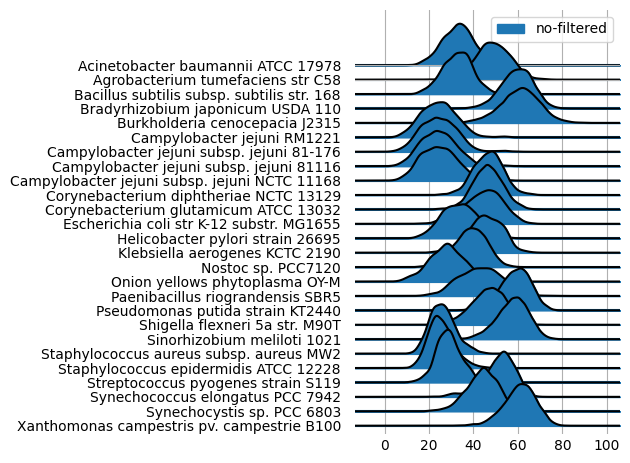

In [47]:
df = pd.DataFrame({'no-filtered': bacteria_df['gc'],
                       'species': bacteria_df['SpeciesName']})

fig, ax = joypy.joyplot(df, by="species", legend=True, grid=True)

In [4]:
random_dataset_df = pd.read_csv('./data/processed/random/dataset.csv')
random_dataset_raw_df = pd.read_csv('./data/processed/random/sample.csv')
cds_dataset_df = pd.read_csv('./data/processed/cds/dataset.csv')

In [5]:
random_dataset_df['gc'] = random_dataset_df['Sequence'].apply(gc_percentage)
random_dataset_raw_df['gc'] = random_dataset_raw_df['Sequence'].apply(gc_percentage)
cds_dataset_df['gc'] = cds_dataset_df['Sequence'].apply(gc_percentage)


In [6]:
random_dataset_df_labeled = random_dataset_df.copy()
random_dataset_df_labeled['dataset'] = 'Random'
cds_dataset_df_labeled = cds_dataset_df.copy()
cds_dataset_df_labeled['dataset'] = 'CDS'
random_and_cds_df = pd.concat([random_dataset_df_labeled, cds_dataset_df_labeled])

# set specie labels 
random_and_cds_df['SpeciesName'] = random_and_cds_df['SpeciesName'].map(SELECTED_SPECIES_LABELS_MAP)
random_and_cds_df['label'] = random_and_cds_df['label'].map(PROMOTER_CLASS_LABEL_MAP)

In [12]:
# create overall speciesname
overall_df = random_and_cds_df.copy()
overall_df['SpeciesName'] = 'Overall'

In [17]:
merged_df = pd.concat([random_and_cds_df, overall_df])
merged_df.reset_index(drop=True, inplace=True)

In [14]:
palette = ["#0072BC", "#00A651"]  # Ejemplo de azul oscuro y rojo oscuro para alto contraste

In [15]:
def custom_kdeplot(data, **kwargs):
    label = kwargs.pop('label')
    #print("label", label)
    if label == PROMOTER_CLASS_LABEL_MAP[0]:
        sns.kdeplot(data=data, **kwargs, linestyle="-")
    elif label == PROMOTER_CLASS_LABEL_MAP[1]:
        sns.kdeplot(data=data, **kwargs, linestyle="--")

    

In [18]:
merged_df

,id,SpeciesName,Sequence,label,gc,dataset
0,id=17003,S. meliloti,gggtatcacgagaatatcggagaaaaggatcgcggcatcgaagccg...,Promoter,59.2593,Random
1,id=17002,S. meliloti,gagagcgctcacccctccccccatctggctgatgcgacaagcggga...,Promoter,66.6667,Random
2,id=17001,S. meliloti,caaaccgacagcgggccgggcaaacgggctcgacttcgtgcggcca...,Promoter,67.9012,Random
3,id=17000,S. meliloti,ttcgcatgcagccagcccccgacaaagccatagacgctccaggcga...,Promoter,59.2593,Random
4,id=16999,S. meliloti,cagcgtcagcagaaaaacgcagagaatcttcgcatgcagccagccc...,Promoter,56.7901,Random
...,...,...,...,...,...,...
525171,id=lcl|NC_003063.2_cds_WP_010974013.1_4260,Overall,gcggacggcatgggtctactcggaatatggcaataacttcgtgaaa...,Non-promoter,51.8519,CDS
525172,id=lcl|NC_003062.2_cds_WP_010971349.1_1013,Overall,atcccgcaccatgcagccggtgctgcaggccggaaaccgggtggac...,Non-promoter,69.1358,CDS
525173,id=lcl|NC_003064.2_cds_WP_010974751.1_5045,Overall,gacggaactctgctgcatcaacaagggctccttcctctggcttccc...,Non-promoter,58.0247,CDS
525174,id=lcl|NC_003063.2_cds_WP_010972688.1_2723,Overall,gacgcggcttgccgcccggctgttttttgactgtacgcccaaatcc...,Non-promoter,60.4938,CDS


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


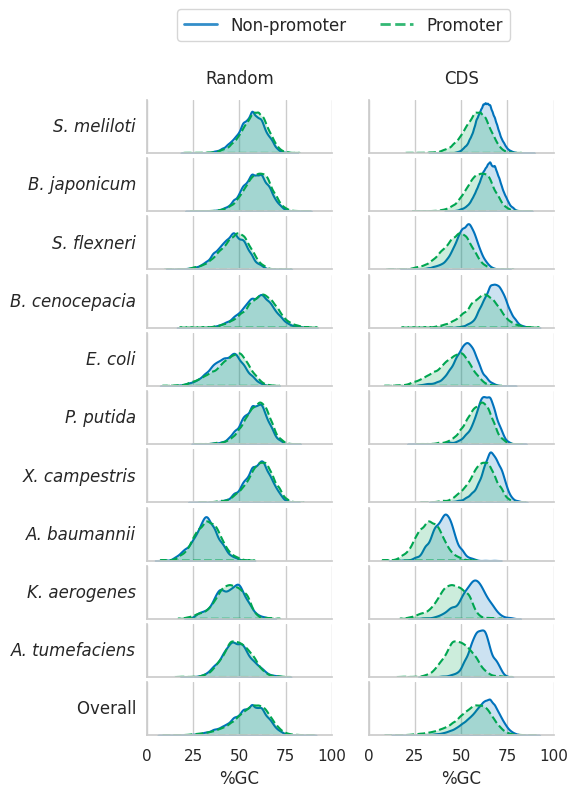

In [74]:
g = sns.FacetGrid(merged_df, row='SpeciesName', hue='label', col="dataset",
                  aspect=3.5, height=0.75, 
                  gridspec_kws={'hspace': 0.1},
                  palette=palette, sharey=True, sharex=True,
                  hue_order=[PROMOTER_CLASS_LABEL_MAP[0], PROMOTER_CLASS_LABEL_MAP[1]],
                  row_order=SELECTED_SPECIES_LABELS + ['Overall'])
g.map(custom_kdeplot, 'gc', bw_adjust=0.8, clip_on=True, fill=True, alpha=0.2, linewidth=1.5)

g.set(yticks=[])
g.set(ylabel=None)
g.set_titles("")

legend_elements = [
    Line2D([0], [0], color=palette[0], lw=2, linestyle='-', label=PROMOTER_CLASS_LABEL_MAP[0], alpha=0.8),
    Line2D([0], [0], color=palette[1], lw=2, linestyle='--', label=PROMOTER_CLASS_LABEL_MAP[1], alpha=0.8),
]
g.figure.legend(handles=legend_elements, title=None, bbox_to_anchor=(0.5, 1), loc='upper center', ncol=2, fontsize=12)

g.set(xticks=range(0, 101, 25), xticklabels=[f'{i}' for i in range(0, 101, 25)], xlabel='GC Percentage')
g.set(xlabel='%GC')

for i, ax in enumerate(g.axes.flat):
    especie_index = i // len(g.col_names)
    label_text = SELECTED_SPECIES_LABELS_OVERALL[especie_index]
    is_italic = label_text != 'Overall'
    if i % len(g.col_names) == 0:
        ax.set_ylabel(label_text + " ", rotation=0, ha='right', va='center', fontsize=12, fontstyle='italic' if is_italic else 'normal')
    else:
        ax.set_ylabel('')

for ax, col_name in zip(g.axes[0], g.col_names):
    ax.set_title(col_name, pad=12, fontsize=12)
        
plt.show()
g.savefig('dataset_gc.pdf')